<a href="https://colab.research.google.com/github/jakeleale/Brain-Tumor-Detection/blob/main/VGG16_on_Harvard_Medical_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [12]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [13]:
image_size = [256,256]
data_path = '/content/drive/My Drive/Harvard_Medical_Dataset2'

In [14]:
conv = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

In [16]:
conv.output

<KerasTensor shape=(None, 8, 8, 512), dtype=float32, sparse=False, name=keras_tensor_43>

In [17]:
for layer in conv.layers:
    layer.trainable = False

In [18]:
x = conv.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)
x=  Dropout(.2)(x)
pred = Dense(2,activation='softmax')(x)
model = Model(inputs = conv.input,outputs=pred)

In [19]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 16,815,426 (64.15 MB)

 Trainable params: 2,100,738 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    validation_split=0.2)

train_generator=train_datagen.flow_from_directory('/gdrive/MyDrive/Harvard_Medical_Dataset2', target_size=(256,256), color_mode='rgb', shuffle=False, subset='training', batch_size=10, class_mode='categorical')
val_generator = train_datagen.flow_from_directory('/gdrive/MyDrive/Harvard_Medical_Dataset2', target_size=(256,256), color_mode='rgb', shuffle=False, subset='validation', batch_size=10, class_mode='categorical')

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 122 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [21]:
print(train_generator.n)
print(train_generator.batch_size)
print(242//32)

122
10
7


In [22]:
print(val_generator.n)
print(val_generator.batch_size)

30
10


In [25]:
# Instead of using fit_generator, use fit with steps_per_epoch
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=13,
    verbose=1,
    validation_data=val_generator
)

Epoch 1/13
12/12 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - accuracy: 0.4474 - loss: 2.1006 - val_accuracy: 0.5333 - val_loss: 0.6900
Epoch 2/13
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.0000e+00 - loss: 0.7718 - val_accuracy: 0.4667 - val_loss: 0.7003
Epoch 3/13
12/12 ━━━━━━━━━━━━━━━━━━━━ 145s 10s/step - accuracy: 0.3396 - loss: 0.7825 - val_accuracy: 0.5333 - val_loss: 0.6901
Epoch 4/13
12/12 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3000 - loss: 0.7331 - val_accuracy: 0.5333 - val_loss: 0.6912
Epoch 5/13
12/12 ━━━━━━━━━━━━━━━━━━━━ 131s 11s/step - accuracy: 0.5757 - loss: 0.6980 - val_accuracy: 0.4667 - val_loss: 0.6912
Epoch 6/13
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 1.0000 - loss: 0.6257 - val_accuracy: 0.4667 - val_loss: 0.6887
Epoch 7/13
12/12 ━━━━━━━━━━━━━━━━━━━━ 140s 12s/step - accuracy: 0.5572 - loss: 0.6880 - val_accuracy: 0.5333 - val_loss: 0.6873
Epoch 8/13
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.0000e+00 - loss: 0.8774 - val_accuracy: 0.

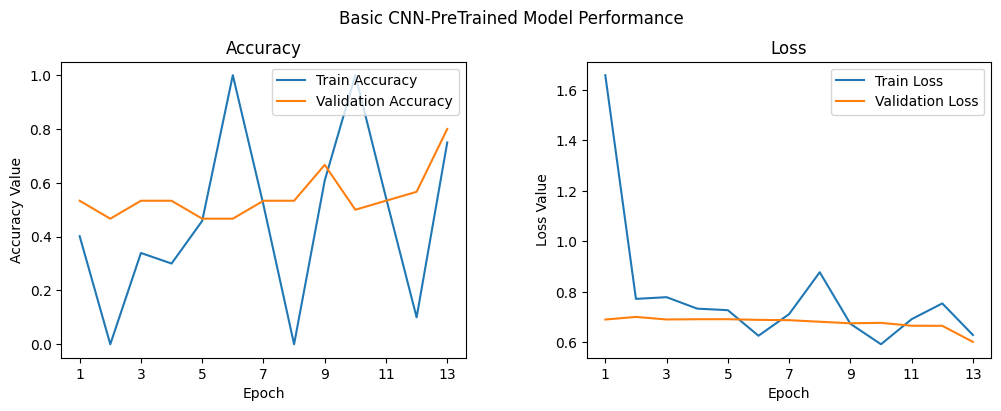

In [28]:
import matplotlib.pyplot as plt
import numpy as np

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN-PreTrained Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

# Change epoch_list to match the number of epochs in your training history
epoch_list = list(range(1, len(history.history['accuracy']) + 1))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, len(history.history['accuracy']) + 1, 2)) # Adjust x-ticks accordingly
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, len(history.history['loss']) + 1, 2)) # Adjust x-ticks accordingly
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.show()

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [31]:
#Confution Matrix and Classification Report
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 9s/step


In [32]:
print(val_generator.classes)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

Confusion Matrix
[[15  1]
 [ 4 10]]


In [34]:
print('Classification Report')
target_names = ['Abnormal', 'Normal']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Abnormal       0.79      0.94      0.86        16
      Normal       0.91      0.71      0.80        14

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



Text(113.9222222222222, 0.5, 'True Values')

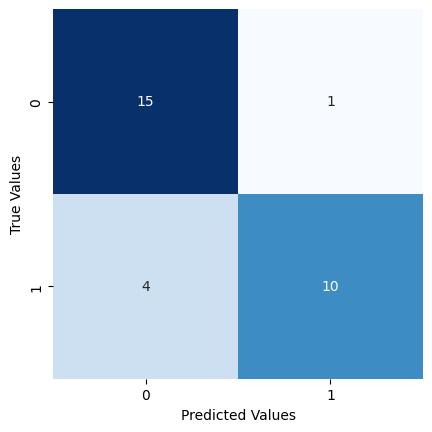

In [35]:
import seaborn as sns
cm=confusion_matrix(val_generator.classes, y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

[Text(0, 0.5, 'Abnormal'), Text(0, 1.5, 'Normal')]

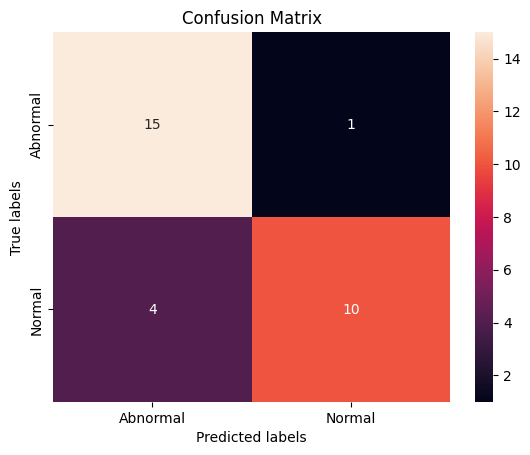

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal'])

Confusion Matrix :
[[15  1]
 [ 4 10]]
Accuracy Score : 0.8333333333333334
Report : 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.91      0.71      0.80        14

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



<Axes: >

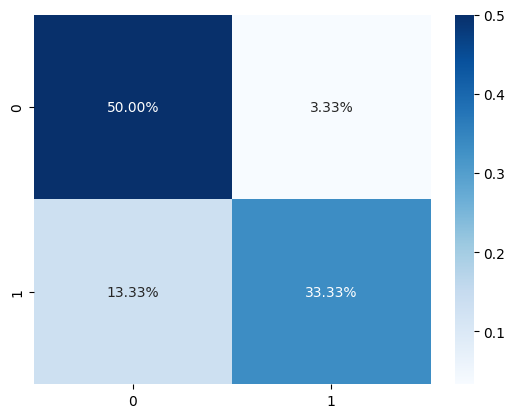

In [37]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(val_generator.classes,y_pred)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(val_generator.classes,y_pred))
print('Report : ')
print(classification_report(val_generator.classes,y_pred))

sns.heatmap(results/np.sum(results), annot=True,
            fmt='.2%', cmap='Blues')

In [38]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_generator.classes, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.8258928571428572

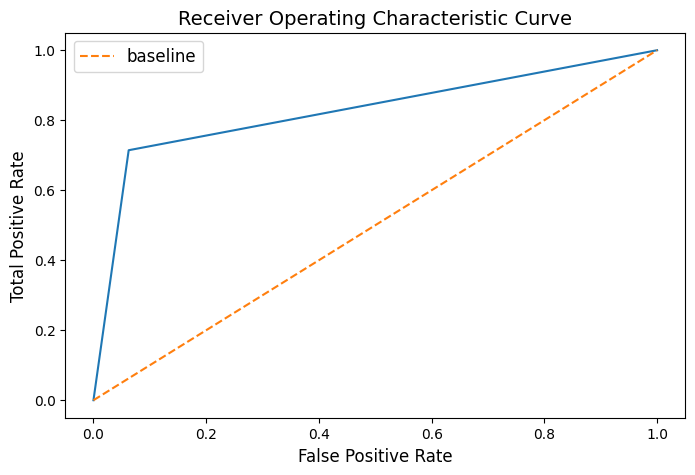

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);

In [ ]:
model.save('/content/drive/My Drive/Harvard Medical Dataset2/my_VGG16finalmodel.h5')

In [ ]:
model.save_weights('/content/drive/My Drive/Harvard Medical Dataset2/my_VGG16finalweight')

In [44]:
pituatary = train_datagen.flow_from_directory('/gdrive/MyDrive/DS340/Testing/pituitary')

Found 0 images belonging to 0 classes.


In [52]:

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#For multiple images in a folder:
import os

test_image_dir = '/gdrive/MyDrive/brain_mri_scan_images/negative' # Replace with your directory


negative_pred = []

# Loop through each image in the directory
for filename in os.listdir(test_image_dir):
  if filename.endswith(('.jpg', '.jpeg', '.png')): # Check for image extensions
    test_image_path = os.path.join(test_image_dir, filename)
    img = image.load_img(test_image_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    predicted_class = np.argmax(preds[0])
    negative_pred.append(predicted_class)

test_image_dir = '/gdrive/MyDrive/brain_mri_scan_images/positive' # Replace with your directory


positive_pred = []

# Loop through each image in the directory
for filename in os.listdir(test_image_dir):
  if filename.endswith(('.jpg', '.jpeg', '.png')): # Check for image extensions
    test_image_path = os.path.join(test_image_dir, filename)
    img = image.load_img(test_image_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    predicted_class = np.argmax(preds[0])
    positive_pred.append(predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━

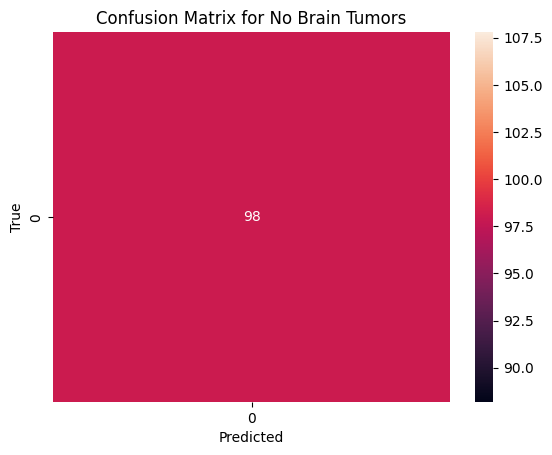

In [59]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_true' and 'y_pred' are defined from your new test data
negative_answer = [0] *98

# Calculate the confusion matrix
cm = confusion_matrix(negative_answer, negative_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")  # annot=True displays the numbers in each cell, fmt='d' for integer formatting
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for No Brain Tumors")
plt.show()


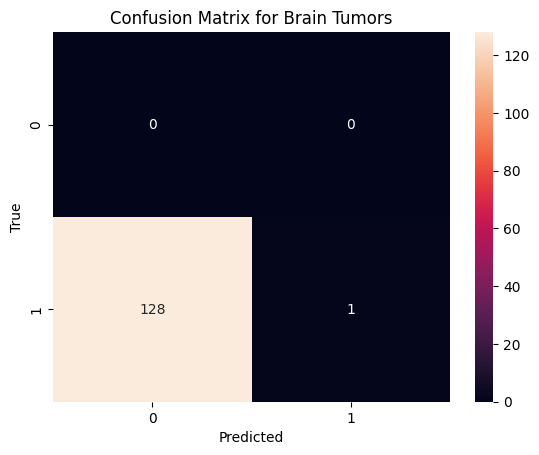

In [57]:
# Calculate the confusion matrix
positive_answer = [1] * 129
cm = confusion_matrix(positive_answer, positive_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")  # annot=True displays the numbers in each cell, fmt='d' for integer formatting
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Brain Tumors")
plt.show()